### numpy
1) 배열 생성 : np.array(), np.zeros(), np.ones(), np.empty()_빈 객체 생성, 초기화 시켜줌, np.arange(), np.linspace(),
2) 배열 연산 : 사칙연산, np.dot()_내적(행렬 곱셈), np.sum(), np.mean(), np.max(), np.min(), np.std(), np.var(), np.sqrt()_제곱근
3) 형태변경, 슬라이싱: np.reshape(), np.transpose()_행과 렬을 바꿔주겠다., arr.T [start:end-1:step]
4) 인덱싱과 부울 마스킹 : 배열 요소 접근, 조건에 따라 배열 요소 접근
5) 집계 정렬 : np.sort(), np.unique()_종복요소제거, np.histogram()_평균화 만들때 많이 쓴다.
6) 브로드캐스팅 : 서로 다른 크기의 배열간에 연산을 수행하는 기능 // 메소드는 없는데 numpy가 가진 속성 중에 np.newaxis
7) 선형대수 : np.linalg.inv()_행렬 자체의 역행렬, det()_행렬식을 만드는 것, eig()_정사각형 행렬의 고유값과 고유벡터
8) 논리연산 : np.logical_and(), np.logical_or(), np.logical_not()

### a.sort() 랑 sort(a)랑 차이점
- 이 메서드는 리스트 a를 "in-place"로 정렬합니다. "In-place" 정렬은 원래의 리스트를 변경하며, 새로운 정렬된 리스트를 생성하지 않습니다. 따라서 메모리 사용이 효율적입니다. 이 메서드는 None을 반환하며, 원래의 리스트가 정렬된 상태로 변경됩니다.
- 이 함수는 리스트 a를 정렬한 새로운 리스트를 반환합니다. 원래의 리스트는 변경되지 않습니다. 따라서 정렬된 결과를 사용하고 싶을 때, 원래의 리스트를 유지하고자 할 때 유용합니다.

#### 5) 집계 정렬 : np.sort(), np.unique()_중복요소제거, np.histogram()를 활용해보자.

In [1]:
import numpy as np

In [7]:
arr=np.array([3,6,8,8,7,4,7,9,2,9,0,8,9,8,4,3])
arr

array([3, 6, 8, 8, 7, 4, 7, 9, 2, 9, 0, 8, 9, 8, 4, 3])

In [8]:
# 정렬
np.sort(arr)

array([0, 2, 3, 3, 4, 4, 6, 7, 7, 8, 8, 8, 8, 9, 9, 9])

In [2]:
help(np.sort)
#     =========== ======= ============= ============ ========
#        kind      speed   worst case    work space   stable
#     =========== ======= ============= ============ ========
#     'quicksort'    1     O(n^2)            0          no
#     'heapsort'     3     O(n*log(n))       0          no
#     'mergesort'    2     O(n*log(n))      ~n/2        yes
#     'timsort'      2     O(n*log(n))      ~n/2        yes
#     =========== ======= ============= ============ ========
# 나중에 알고리즘이랑 코테할 때 쓴다고 함

Help on function sort in module numpy:

sort(a, axis=-1, kind=None, order=None)
    Return a sorted copy of an array.
    
    Parameters
    ----------
    a : array_like
        Array to be sorted.
    axis : int or None, optional
        Axis along which to sort. If None, the array is flattened before
        sorting. The default is -1, which sorts along the last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort or radix sort under the covers and, in general,
        the actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stable' option was added.
    
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A si

In [2]:
import numpy as np

dtype = [('name', 'U10'), ('height', 'f4'), ('age', 'i4')]
values = [('Arthur',        1.8,               41), 
          ('Lancelot',      1.9,               38),
          ('Galahad',       1.7,               38),
          ('홍길동',        2.0,               18),
          ('김길동',        1.7,               28),
          ('김길동',        1.7,               28),]
a = np.array(values, dtype=dtype)
print(np.sort(a, order='name'))

[('Arthur', 1.8, 41) ('Galahad', 1.7, 38) ('Lancelot', 1.9, 38)
 ('김길동', 1.7, 28) ('김길동', 1.7, 28) ('홍길동', 2. , 18)]


In [10]:
# 중복 요소 제거
np.unique(arr), arr

(array([0, 2, 3, 4, 6, 7, 8, 9]),
 array([3, 6, 8, 8, 7, 4, 7, 9, 2, 9, 0, 8, 9, 8, 4, 3]))

In [4]:
res=np.unique(a)
res.shape, res

((5,),
 array([('Arthur', 1.8, 41), ('Galahad', 1.7, 38), ('Lancelot', 1.9, 38),
        ('김길동', 1.7, 28), ('홍길동', 2. , 18)],
       dtype=[('name', '<U10'), ('height', '<f4'), ('age', '<i4')]))

In [11]:
# 히스토그램 histogram()
 
# << 아날로그 -> 디지털 변환 흐름>>
# 아날로그에서 디지털로 바꾸려면 양자화 작업을 해야 한다. 히스토빈즈가 발생하는데
# 이미지가 들어오면 가져다가 구간별 샘플링을 가지고 오고 주파수 변환을 한다. 아날로그니까 파형으로 뽑아오고(사인코사인합)
# 어느 구간을 샘플링 하고 빈즈를 만들고 히스토가 발생. 한 구간씩 컴퓨터가 빈즈당 하나씩 만든다.
# 구간별 최대값이 나오는데 전체 데이터에서 빈즈라고 하는데
# S(샘플링) -> 양자화(최대값) -> 이진화(로 바꾸는 코드가 디지털)
# 양자화 하위 구간이랑 맥스 해논거랑 이등분? 이랑 해서 2진화로 만들고
# 이진화는 양자화 0부터 최대값 등 3등분 해서 0000 0001 등 만든다. 1 2 4 8
# 이걸 가지고 와서 벡터라이징 한 다음에 계산해서 이미지 복원해서 사용
# 양자화는 주파수 분리이며 이때 히스토그램을 쓴다. 
# 히스토그램은 빈즈로 나눈 값을 가져다가 그 구간의 값을 활용하는 것이다.

# help(np.histogram)
# 히스토그램 -> 데이터 분포 시각화 / 색상대조 대비(색상분포)
# : 주어진 데이터를 구간(bins)에 따라 나누고, 각 구간에 속하는 데이터 포인트의 개수를 hist 배열에 저장한다.
# 구간의 정보를 bins 배열에 저장한다.
# return: hist(array), bin_deges
hist,bins=np.histogram([1, 2, 1], bins=[0, 1, 2, 3])
print("빈도 : ", hist) #[0, 2, 1]
print("구간 : ", bins) #[0, 1, 2, 3]
# [0, 1, 2, 3] 구간의 첫 경계 첫번째 구간 0이상 1미만, 두번째 구간 1이상 2미만, 세번째 구간 2이상 3미만

빈도 :  [0 2 1]
구간 :  [0 1 2 3]


## 무시....
- data [1, 2, 1] bins = [0, 1, 2, 3]
- 첫번째 구간 [0, 1]에는 1과 1이 포함  -> hist 첫번째 요소는 2
- 두번째 구간 [1, 2]에는 2가 포함      -> hist 두번째 요소는 1
- 세번째 구간 [2, 3]에는 데이터가 없다 -> hist 세번째 요소는 0  
hist = [2, 1, 0]  
bins = [0, 1, 2, 3]

In [51]:
b=np.histogram(np.arange(4), bins=np.arange(5), density=True)
#(array([0.25, 0.25, 0.25, 0.25]), array([0, 1, 2, 3, 4]))

c=np.histogram([[1, 2, 1], [1, 0, 1]], bins=[0,1,2,3])
#(array([1, 4, 1]), array([0, 1, 2, 3]))

[0, 0, 0, 1, 1, 2]
빈도: [3 2 1]
구간 경계: [0.         0.66666667 1.33333333 2.        ]


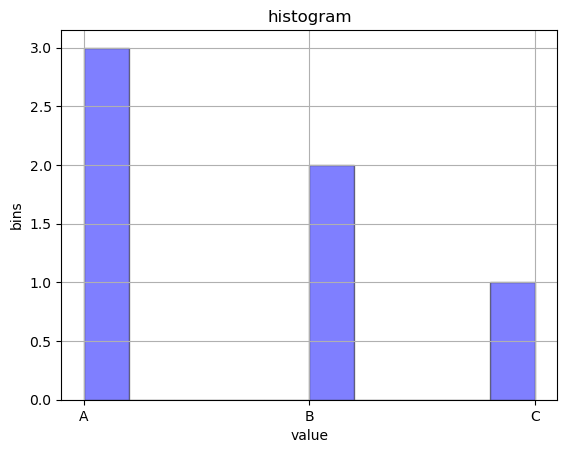

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#data = [5,5,5,2,2,3,3,4,4,6]

# 문자열에 대한 히스토그램 진행 해보기
# bins 에는 숫자만 넣어야 해서 딕셔너리로 변경해서 하면 된다.
data = ['A','A','A','B','B','C']

my_key={'A':0, 'B':1, 'C':2}

mapped_data=[my_key[item] for item in data]
print(mapped_data)

# 히스토그램 계산
hist, bins = np.histogram(mapped_data, bins=3)
# 데이터를 가지고 bins를 만든다. bins가 0 1 2 3 항상 이런게 아니라 
# 구간 경계: [0.         0.66666667 1.33333333 2.        ] 데이터에 따라 변함

print("빈도:", hist)
print("구간 경계:", bins)

# 히스토그램 시각화
# alpha는 matplotlib 라이브러리에서 그래픽 요소의 투명도를 나타내는 매개변수입니다. 
# 0에서 1 사이 부동소수점. 
# 0에 가까울수록 투명하고, 1에 가까울수록 불투명합니다.
plt.hist(data, bins=10, alpha=0.5, color='b', edgecolor='black')
plt.xlabel("value")
plt.ylabel("bins")
plt.title("histogram")
plt.grid(True)
plt.show()

#### 6) 브로드캐스팅 : 서로 다른 크기의 배열간에 연산을 수행하는 기능 // 메소드는 없는데 numpy가 가진 속성 중에 np.newaxis
- https://numpy.org/doc/stable/reference/generated/numpy.broadcast.html#numpy.broadcast

In [64]:
# 크기가 같은 배열 연산 (연산은 보통 사이즈가 다를 때 많이 쓴다)
arr1= np.array([1,2,3,4])
arr2= np.array([10,20,30,40])
print(arr1+arr2) # 색상 대비, 밝기를 더 강하게 조정한다. (이미지, 영상, 소리 -> 숫자의 배열로 변환 -> 연산하게 된다.)
                 # 영상의 기본 단위는 픽셀이고 화소라고 한다. (x,y,[R,G,B])
print(arr1-arr2) # 색상 대비, 밝기가 어두워짐
print(arr1*arr2)
print(arr1/arr2)

[11 22 33 44]
[ -9 -18 -27 -36]
[ 10  40  90 160]
[0.1 0.1 0.1 0.1]


In [17]:
# 크기가 다른 크기의 배열 연산
arr1= np.array([1,2,3])
arr2= np.array([10,20,30,40])
#print(arr1*arr2)  Error arr1에 arr2를 곱하겠다
print(arr1)
print(arr2)
res=arr2[:,np.newaxis] # 행과 열이면 2차원으로 만들겠다. newaxis 새롭게 축을 만듦
print(res, res.shape)
print(arr1*res) # 열벡터로 변환한 다음 곱셈을 수행한다.

[1 2 3]
[10 20 30 40]
[[10]
 [20]
 [30]
 [40]] (4, 1)
[[ 10  20  30]
 [ 20  40  60]
 [ 30  60  90]
 [ 40  80 120]]
[[ 10  20  30]
 [ 20  40  60]
 [ 30  60  90]
 [ 40  80 120]]


In [16]:
# 규칙: 2*3 행렬과 3*4 행렬을 곱하려면 두번째 행렬의 열의 수와 첫번째 행렬의 행수가 일치하여야 한다.
a=np.array([[1,2,3],
            [4,5,6]])

b=np.array([[7,8,9,10],
            [11,12,13,14],
            [15,16,17,18]])

result = np.dot(a,b)
print(result)

hap=np.sum(result)
print(hap)

[[ 74  80  86  92]
 [173 188 203 218]]
1114


행렬 곱셈을 수행할 때 규칙  
-- 1) 첫번째 행렬의 열수와 두번째 행렬의 행 수가 동일해야 한다.  
-- 2) 행렬의 결과 크기는 첫번째 행렬의 행 수와 두번째 행렬의 열 수에 의해 결정된다.  

-- ex) A = m x n, B = n x p 라면 두행렬의 곱한 결과 행렬 C 는 m x p가 된다.